<a href="https://colab.research.google.com/github/danhorsley/DS-Unit-2-Sprint-3-Classification-Validation/blob/master/unit2_sprint_3_assignment_1_try_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://os.unil.cloud.switch.ch/fma/fma_metadata.zip
!unzip fma_metadata.zip

--2019-05-07 07:35:11--  https://os.unil.cloud.switch.ch/fma/fma_metadata.zip
Resolving os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)... 86.119.28.13, 2001:620:5ca1:2ff::ce53
Connecting to os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)|86.119.28.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358412441 (342M) [application/zip]
Saving to: ‘fma_metadata.zip’

fma_metadata.zip    100%[===================>] 341.81M  25.5MB/s    in 14s     

2019-05-07 07:35:25 (24.5 MB/s) - ‘fma_metadata.zip’ saved [358412441/358412441]

Archive:  fma_metadata.zip
 bunzipping: fma_metadata/README.txt  
 bunzipping: fma_metadata/checksums  
 bunzipping: fma_metadata/not_found.pickle  
 bunzipping: fma_metadata/raw_genres.csv  
 bunzipping: fma_metadata/raw_albums.csv  
 bunzipping: fma_metadata/raw_artists.csv  
 bunzipping: fma_metadata/raw_tracks.csv  
 bunzipping: fma_metadata/tracks.csv  
 bunzipping: fma_metadata/genres.csv  
 bunzipping: fma_metadata/raw_echonest.cs

In [16]:
#first import as multi-index
import pandas as pd
df=pd.read_csv('fma_metadata/tracks.csv',header=[0,1],index_col=0)
#df=df.drop(0,axis=0)
df.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                        ...       track                         \
         producer tags  ... information interest language_code   
track_id                ...                                      
2             NaN   []  ...         NaN     4656            en   
3             NaN   []  ...         NaN     1470            en   
5             NaN   []  ...         NaN     1933            en   
10            NaN   []  ...         NaN    54881            en   
20            NaN   []  ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [17]:
df.columns

MultiIndex(levels=[['album', 'artist', 'set', 'track'], ['active_year_begin', 'active_year_end', 'associated_labels', 'bio', 'bit_rate', 'comments', 'composer', 'date_created', 'date_recorded', 'date_released', 'duration', 'engineer', 'favorites', 'genre_top', 'genres', 'genres_all', 'id', 'information', 'interest', 'language_code', 'latitude', 'license', 'listens', 'location', 'longitude', 'lyricist', 'members', 'name', 'number', 'producer', 'publisher', 'related_projects', 'split', 'subset', 'tags', 'title', 'tracks', 'type', 'website', 'wikipedia_page']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [5, 7, 9, 11, 12, 16, 17, 22, 29, 34, 35, 36, 37, 0, 1, 2, 3, 5, 7, 12, 16, 20, 23, 24, 26, 27, 31, 34, 38, 39, 32, 33, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 17, 18, 19, 21, 22, 25, 28, 30, 34, 35]])

In [0]:
#make a genre dictionary mapping string names to values
#json loads just turns the list elements in genres and genres all to actual lists when you call them
import json
genre_dict={}
for i in genre_nonans.index:
  if genre_nonans['genre_top'][i] in genre_dict:
    continue
  else:
    genre_dict[genre_nonans['genre_top'][i]]=json.loads(genre_nonans['genres'][i])[0]
    
  

In [0]:
#there seems to be some kind of ordering on 'genres all' so just take the first elemenent where genre top is nan originally
targets=['genre_top',	'genres',	'genres_all']
genre_map=df['track'][['genre_top',	'genres',	'genres_all']].copy()

final_list=[]
for i in genre_map.index:
  key=genre_map['genre_top'][i]
  if pd.isnull(key)==False:
    temp_val=genre_dict[key]
    final_list.append(temp_val)
  else:
    code_list=json.loads(genre_map['genres_all'][i])
    temp_list=[]
    for code in code_list:
      if int(code) in genre_dict.values():
        temp_list.append(code)
      else:
        continue
    temp_list.append(0)
    final_list.append(temp_list[0])


genre_map['genre_final']=final_list

In [106]:
#there are only 9,400 0 values now which is much better than the 50,000.  there is a futher genre dictionary to download
#but on several numbers you have to do multiple look ups to get the final parent so probably not worth it so we can drop all teh zeros
#and all the categories with less than 2,000 value count
#genre_map[genre_map['genre_final']==0].tail(20)
count_dict=genre_map['genre_final'].value_counts().to_dict()
genre_map['count']=genre_map['genre_final'].map(count_dict)
genre_map['genre_final']=np.where(genre_map['count']<2000,0,genre_map['genre_final'])
genre_map['genre_final'].value_counts()

15     25765
1      15255
45     14828
0      14770
10     11527
17      9713
21      6617
4       3138
5       2818
538     2143
Name: genre_final, dtype: int64

In [126]:
genre_map.isna().sum()

genre_top      56976
genres             0
genres_all         0
genre_final        0
count              0
dtype: int64

In [130]:
#flatten dataframe at put categories to codes
df=pd.read_csv('fma_metadata/tracks.csv',skiprows=1)
df.rename(columns={'Unnamed: 0':'track_id',
                        }, 
                 inplace=True)
df=df.drop(0,axis=0)
len(df)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


106574

In [0]:
df['genre_final']=list(genre_map['genre_final'])
import datetime as dt
col_dates = ['date_created', 'date_released','active_year_begin','active_year_end','date_created.1','date_created.2','date_recorded']
cols_cat=[ 'engineer', 'information',
       'producer', 'tags', 'title', 'type', 
        'associated_labels', 'bio', 
       'location', 'members', 'name', 'related_projects', 'tags.1', 'website',
       'wikipedia_page', 'split', 'subset', 'composer', 
         'information.1',
       'language_code', 'license', 'lyricist', 'publisher', 'tags.2',
       'title.1']
for col in cols_cat:
    df[col] = pd.Categorical(df[col])
    df[col] = df[col].cat.codes
    
#taking just the year and month for all the dates
for cold in col_dates:
    name='{}_month'.format(cold)
    df[cold]=pd.to_datetime(df[cold]).dt.year
    df[name]=pd.to_datetime(df[cold]).dt.month

In [133]:
#take out 0 values for genre
df=df[df['genre_final']!=0]
df['genre_final'].value_counts()

15     25765
1      15255
45     14828
10     11527
17      9713
21      6617
4       3138
5       2818
538     2143
Name: genre_final, dtype: int64

In [135]:
#here we choose features split into train test set then impute missing values and scale it to mean 0, std 1
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
targets=['genre_top','genres','genres_all','genre_final']
features=['date_released', 'engineer',
       'favorites','listens', 'producer', 'tags',
        'tracks', 'type','associated_labels','latitude', 
    'longitude','composer','duration', 
       'language_code', 'license', 'publisher','date_released_month']

y=df.copy()[targets[3]]
X=df.copy()[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer2=SimpleImputer()
X_train_imputed=imputer2.fit_transform(X_train)
X_test_imputed = imputer2.transform(X_test)
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_imputed)
mylogreg = LogisticRegression(solver='lbfgs')#,max_iter=1000,multi_class='ovr')
mylogreg.fit(X_train_scaled,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [136]:
#accuracy score seems ok. would be surprised with much higher
my_score=mylogreg.score(X_train_scaled, y_train)
print('train accuracy score',my_score)

train accuracy score 0.36196778454039186


In [138]:
X_test_scaled=scaler.transform(X_test_imputed)
score_test=mylogreg.score(X_test_scaled, y_test)
print('test accuracy score',score_test)

test accuracy score 0.367082402919231


In [140]:
len(features)

17

In [144]:
#see the importance of coefficients by summing absolute values
#we can do this as data is scaled 
coeffs=pd.DataFrame(mylogreg.coef_)
coeffs.columns=features
coeffs.abs().sum()

date_released          0.795723
engineer               1.004941
favorites              0.968917
listens                4.690555
producer               0.721325
tags                   1.364323
tracks                 2.902000
type                   1.691798
associated_labels      1.315510
latitude               0.712207
longitude              0.765599
composer               2.025792
duration               2.485333
language_code          0.696206
license                0.958314
publisher              1.132953
date_released_month    0.000000
dtype: float64

In [0]:
#tracks, listens, composer and duration, 
#i would have expected location to have more of an effect
#i would have expected month to have some predictive value, as music is realeased seasonally, but apparently not

In [0]:
proba_list=mylogreg.predict_proba(X_test_scaled)
proba_max=[proba_list[i].max() for i in range(0,len(proba_list))]

In [156]:
max(proba_max),min(proba_max)

(0.7849920022223265, 0.16734645132197248)

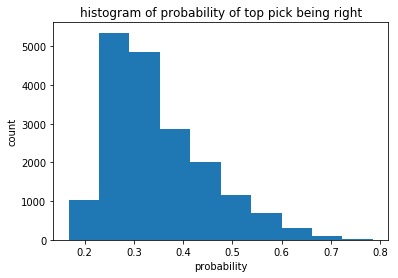

In [161]:
import matplotlib.pyplot as plt
plt.hist(proba_max,bins=10)
plt.title('histogram of probability of top pick being right')
plt.xlabel('probability')
plt.ylabel('count');

In [0]:
#takign a look at raw genre data
import numpy as np
rg=pd.read_csv('fma_metadata/raw_genres.csv')#,header=[0,1],index_col=0)
parent_id_list=list(rg[rg['genre_parent_id'].isna()==False]['genre_parent_id'])
pid_unique=[]
for x in  parent_id_list:
  if x in pid_unique:
    continue
  else:
    pid_unique.append(x)
rg['is_parent']=np.where((rg['genre_id'].isin(pid_unique)) & (rg['genre_parent_id'].isna()),1,0)

In [145]:
rg.head()

,genre_id,genre_color,genre_handle,genre_parent_id,genre_title,is_parent
0,1,#006666,Avant-Garde,38.0,Avant-Garde,0
1,2,#CC3300,International,NaN,International,1
2,3,#000099,Blues,NaN,Blues,1
3,4,#990099,Jazz,NaN,Jazz,1
4,5,#8A8A65,Classical,NaN,Classical,1
